In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
load_data_inputs_train=pd.read_csv('loan_data_inputs_train.csv',index_col=0)
load_data_targets_train=pd.read_csv('loan_data_targets_train.csv',index_col=0,header=None)
load_data_inputs_test=pd.read_csv('loan_data_inputs_test.csv',index_col=0)
load_data_targets_test=pd.read_csv('loan_data_targets_test.csv',index_col=0,header=None)

In [5]:
load_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:20-25,dti:25-30,dti:30-35,dti:35-40,dti:>40,mths_since_last_record:Missing,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,0,0,1,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,0,0,1,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,0,0,1,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,0,0,1,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,1,0,0,0,0,1,0,0,0,0


In [6]:
load_data_targets_train.head()

,1
0,
NaN,good_bad
427211.0,1
206088.0,1
136020.0,1
412305.0,0


In [7]:
load_data_targets_train=load_data_targets_train.drop(load_data_targets_train.index[0])

In [8]:
load_data_targets_train.head()

,1
0,
427211.0,1
206088.0,1
136020.0,1
412305.0,0
36159.0,0


In [9]:
load_data_targets_train.head()

,1
0,
427211.0,1
206088.0,1
136020.0,1
412305.0,0
36159.0,0


In [10]:
load_data_inputs_train.shape

(373028, 339)

In [11]:
load_data_targets_test.head()

,1
0,
NaN,good_bad
362514.0,1
288564.0,1
213591.0,1
263083.0,1


In [12]:
load_data_targets_test=load_data_targets_test.drop(load_data_targets_test.index[0])

In [13]:
load_data_targets_test.head()

,1
0,
362514.0,1
288564.0,1
213591.0,1
263083.0,1
165001.0,1


In [14]:
load_data_inputs_test.shape

(373028, 339)

In [15]:
load_data_inputs_train.shape

(373028, 339)

In [16]:
load_data_targets_train.shape

(373028, 1)

In [17]:
load_data_targets_test.shape

(93257, 1)

In [18]:
feature_selection=[
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:MORTGAGE',
    'home_ownership:OWN',
    'addr_state:ND_NE_IA_NC_FL_HI_AL',
    'addr_state:NM_VA',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'verification_status:Verified',
    'verification_status:Source Verified',
    'verification_status:Not Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'purpose:small_business',
    'purpose:educational',
    'purpose:renewable_energy',
    'purpose:wedding',
    'purpose:vacation',
    'purpose:house',
    'purpose:medical',
    'purpose:moving',
    'purpose:other',
    'purpose:debt_consolidation',
    'purpose:home_improvement',
    'purpose:car',
    'purpose:major_purchase',
    'purpose:credit_card',
    'initial_list_status:f',
    'initial_list_status:w',
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-4',
    'emp_length:5-6',
    'emp_length:7-9',
    'emp_length:10',
    'mths_since_issued_date:<38',
    'mths_since_issued_date:38-39',
    'mths_since_issued_date:40-41',
    'mths_since_issued_date:42-48',
    'mths_since_issued_date:49-52',
    'mths_since_issued_date:53-64',
    'mths_since_issued_date:65-84',
    'mths_since_issued_date:>84',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281',
    'int_rate:20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:140-239',
    'mths_since_earliest_cr_line:240-339',
    'mths_since_earliest_cr_line:340-439',
    'mths_since_earliest_cr_line:440-539',
    'mths_since_earliest_cr_line:540-600',
    'mths_since_earliest_cr_line:>600',
    'delinq_2yrs:0',
    'delinq_2yrs:0-3',
    'delinq_2yrs:3-7',
    'delinq_2yrs:7-9',
    'delinq_2yrs:9-11',
    'delinq_2yrs:11-12',
    'delinq_2yrs:12-18',
    'delinq_2yrs:>18',
    'inq_last_6mths:0',
    'inq_last_6mths:0-3',
    'inq_last_6mths:3-7',
    'inq_last_6mths:7-9',
    'inq_last_6mths:9-11',
    'inq_last_6mths:11-12',
    'inq_last_6mths:12-18',
    'inq_last_6mths:18',
    'open_acc:=0',
    'open_acc:0-1',
    'open_acc:1-4',
    'open_acc:4-28',
    'open_acc:28-35',
    'open_acc:35-45',
    'open_acc:>45',
    'pub_rec:0-3',
    'pub_rec:3-6',
    'pub_rec:6-8',
    'pub_rec:8',
    'total_acc:<0',
    'total_acc:0-4',
    'total_acc:4-62',
    'total_acc:62-72',
    'total_acc:72-85',
    'total_acc:>85',
    'acc_now_delinq:<0',
    'acc_now_delinq:0-1',
    'acc_now_delinq:1-2',
    'acc_now_delinq:2-3',
    'acc_now_delinq:3-5',
    'acc_now_delinq:>5',
    'annual_inc:<20k',
    'annual_inc:20k-30k',
    'annual_inc:30k-40k',
    'annual_inc:40k-50k',
    'annual_inc:50k-60k',
    'annual_inc:60k-70k',
    'annual_inc:70k-80k',
    'annual_inc:80k-90k',
    'annual_inc:90k-100k',
    'annual_inc:100k-120k',
    'annual_inc:120k-140k',
    'annual_inc:>140k',
    'total_rev_hi_lim:<=5k',
    'total_rev_hi_lim:5k_10k',
    'total_rev_hi_lim:10k_20k',
    'total_rev_hi_lim:20k_30k',
    'total_rev_hi_lim:30k_40k',
    'total_rev_hi_lim:40k_50k',
    'total_rev_hi_lim:50k_65k',
    'total_rev_hi_lim:65k_80k',
    'total_rev_hi_lim:>80k',
    'dti:<5',
    'dti:5-10',
    'dti:10-15',
    'dti:15-20',
    'dti:20-25',
    'dti:25-30',
    'dti:30-35',
    'dti:35-40',
    'dti:>40',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-30',
    'mths_since_last_delinq:31-56',
    'mths_since_last_delinq:>=57',
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-90',
    'mths_since_last_record:90-120',
    'mths_since_last_record:120-127',
    'mths_since_last_record:>=127',
    'loan_amnt',
    'funded_amnt',
    'int_rate',
    'installment',
]

In [19]:
inputs_train_with_ref_cat=load_data_inputs_train.reindex(feature_selection,axis='columns')

In [20]:
inputs_train_with_ref_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Columns: 152 entries, grade:A to installment
dtypes: float64(3), int64(149)
memory usage: 435.4 MB


In [21]:
inputs_train_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:MORTGAGE,home_ownership:OWN,...,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,loan_amnt,funded_amnt,int_rate,installment
427211,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,24000,24000,8.90,762.08
206088,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,10000,10000,14.33,343.39
136020,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,20425,20425,8.90,648.56
412305,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,17200,17200,16.59,609.73
36159,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,8400,8400,12.84,282.40


In [22]:
ref_categories=[
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'addr_state:ND_NE_IA_NC_FL_HI_AL',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mths_since_issued_date:>84',
    'int_rate:20.281',
    'mths_since_earliest_cr_line:<140',
    'delinq_2yrs:>18',
    'inq_last_6mths:7-9',
    'open_acc:=0',
    'pub_rec:0-3',
    'total_acc:>85',
    'acc_now_delinq:<0',
    'total_rev_hi_lim:<=5k',
    'annual_inc:<20k',
    'dti:>40',
    'mths_since_last_delinq:0-3',
    'mths_since_last_record:Missing',
]

In [23]:
input_train = inputs_train_with_ref_cat.drop(ref_categories,axis='columns')
input_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,loan_amnt,funded_amnt,int_rate,installment
427211,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,24000,24000,8.90,762.08
206088,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,10000,10000,14.33,343.39
136020,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,20425,20425,8.90,648.56
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,17200,17200,16.59,609.73
36159,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,8400,8400,12.84,282.40


In [24]:
# Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [26]:
reg=LogisticRegression(max_iter=200)

In [27]:
input_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,loan_amnt,funded_amnt,int_rate,installment
427211,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,24000,24000,8.90,762.08
206088,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,10000,10000,14.33,343.39
136020,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,20425,20425,8.90,648.56
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,17200,17200,16.59,609.73
36159,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,8400,8400,12.84,282.40


In [28]:
input_train=input_train.astype(float)

In [29]:
load_data_targets_train=load_data_targets_train.astype(int)

In [30]:
reg.fit(input_train,load_data_targets_train)

LogisticRegression(max_iter=200)

In [31]:
input_test_with_ref_category=load_data_inputs_test.reindex(feature_selection,axis='columns')

In [32]:
input_test=input_test_with_ref_category.drop(ref_categories,axis=1)

In [33]:
input_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,loan_amnt,funded_amnt,int_rate,installment
427211,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,24000,24000,8.90,762.08
206088,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,10000,10000,14.33,343.39
136020,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,20425,20425,8.90,648.56
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,17200,17200,16.59,609.73
36159,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,8400,8400,12.84,282.40


In [34]:
y_hat_test=reg.predict(input_test)

In [35]:
a=y_hat_test.astype(int)

In [36]:
y_hat_test_proba=reg.predict_proba(input_test)

In [37]:
y_hat_test_proba

array([[0.06086776, 0.93913224],
       [0.11056086, 0.88943914],
       [0.0682071 , 0.9317929 ],
       ...,
       [0.07182077, 0.92817923],
       [0.05635543, 0.94364457],
       [0.04973723, 0.95026277]])

In [38]:
y_hat_test_proba[: ][: ,1]

array([0.93913224, 0.88943914, 0.9317929 , ..., 0.92817923, 0.94364457,
       0.95026277])

In [39]:
y_hat_test_proba=y_hat_test_proba[: ][:,1]

In [40]:
loan_data_targets_test_temp=load_data_targets_test

In [41]:
loan_data_targets_test_temp.reset_index(drop=True,inplace=True)

In [42]:
df_actual_predicted_probs=pd.concat([loan_data_targets_test_temp,pd.DataFrame(y_hat_test_proba)],axis=1)

In [43]:
df_actual_predicted_probs.shape

(373028, 2)

In [44]:
df_actual_predicted_probs.columns=['load_data_target_test','y_hat_test_proba']

In [45]:
df_actual_predicted_probs.index=load_data_inputs_test.index

In [46]:
df_actual_predicted_probs.head()

,load_data_target_test,y_hat_test_proba
427211,1,0.939132
206088,1,0.889439
136020,1,0.931793
412305,1,0.794714
36159,1,0.890587


In [47]:
df_actual_predicted_probs.shape

(373028, 2)

In [48]:
tr=0.9
df_actual_predicted_probs['y_hat_test_proba']=np.where(df_actual_predicted_probs['y_hat_test_proba']>tr,1,0)

In [49]:
pd.crosstab(df_actual_predicted_probs['load_data_target_test'],df_actual_predicted_probs['y_hat_test_proba'],rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,4526,5664
1,37011,46056


In [50]:
confusion_matrix = pd.crosstab(df_actual_predicted_probs['load_data_target_test'],df_actual_predicted_probs['y_hat_test_proba'],rownames=['Actual'],colnames=['Predicted'])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

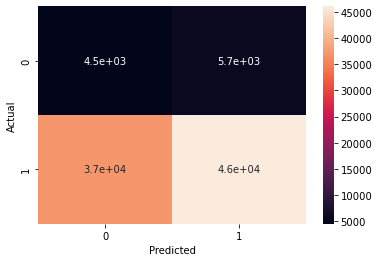

In [51]:
sn.heatmap(confusion_matrix,annot=True)

In [52]:
## model building function

In [53]:
def x_tr_model(model,x_train,y_train,x_test,y_test,tr):
    model.fit(x_train,y_train)
    pred_y=model.predict(x_test)
    y_hat_test_proba=model.predict_proba(x_train) ##
    y_hat_test_proba=y_hat_test_proba[:][:,1]
    load_data_targets_test_temp=y_test
    loan_data_targets_test_temp.reset_index(drop=True,inplace=True)
    df_actual_predicted_probs=pd.concat([loan_data_targets_test_temp,pd.DataFrame(y_hat_test_proba)],axis=1)
    df_actual_predicted_probs.columns=['load_data_target_test','y_hat_test_proba']
    df_actual_predicted_probs.index=load_data_inputs_test.index
    df_actual_predicted_probs['y_hat_test_proba']=np.where(df_actual_predicted_probs['y_hat_test_proba']>tr,1,0)
    return pd.crosstab(df_actual_predicted_probs['load_data_target_test'],df_actual_predicted_probs['y_hat_test_proba'],rownames=['Actual'],colnames=['Predicted'])

In [54]:
crosstab=x_tr_model(LogisticRegression(max_iter=200),input_train,load_data_targets_train,input_test,load_data_targets_test,0.9)

In [55]:
true_positive = crosstab[1][1]

In [56]:
true_negative = crosstab[0][0]

In [57]:
false_positive = crosstab[0][1]

In [58]:
false_negative = crosstab[1][0]

In [59]:
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

In [60]:
print('Accuracy of LogisticRegression model: '+str(round(accuracy*100,3))+'%')

Accuracy of LogisticRegression model: 54.239%


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

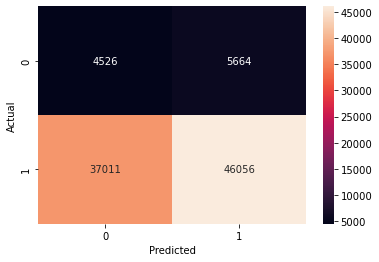

In [61]:
sn.heatmap(crosstab,annot=True,fmt='d')

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
crosstab=x_tr_model(RandomForestClassifier(),input_train,load_data_targets_train,input_test,load_data_targets_test,0.8)

In [64]:
true_positive = crosstab[1][1]

In [65]:
true_negative = crosstab[0][0]

In [66]:
false_positive = crosstab[0][1]

In [67]:
false_negative = crosstab[1][0]

In [68]:
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

In [69]:
print('Accuracy of RandomForestClassifier model: '+str(round(accuracy*100,3))+'%')

Accuracy of RandomForestClassifier model: 80.334%


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

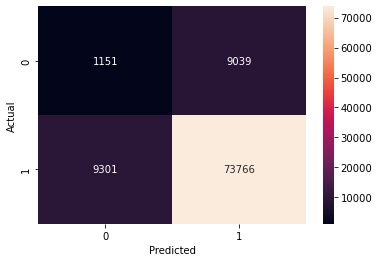

In [70]:
sn.heatmap(crosstab,annot=True,fmt='d')

In [71]:
crosstab=x_tr_model(DecisionTreeClassifier(),input_train,load_data_targets_train,input_test,load_data_targets_test,0.8)

In [72]:
true_positive = crosstab[1][1]

In [73]:
true_negative = crosstab[0][0]

In [74]:
false_positive = crosstab[0][1]

In [75]:
false_negative = crosstab[1][0]

In [76]:
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

In [77]:
print('Accuracy of DecisionTreeClassifier model: '+str(round(accuracy*100,3))+'%')

Accuracy of DecisionTreeClassifier model: 80.366%


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

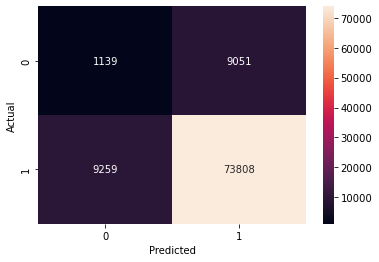

In [78]:
sn.heatmap(crosstab,annot=True,fmt='d')

In [79]:
crosstab=x_tr_model(GradientBoostingClassifier(),input_train,load_data_targets_train,input_test,load_data_targets_test,0.8)

In [80]:
true_positive = crosstab[1][1]

In [81]:
true_negative = crosstab[0][0]

In [82]:
false_positive = crosstab[0][1]

In [83]:
false_negative = crosstab[1][0]

In [84]:
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

In [85]:
print('Accuracy of GradientBoostingClassifier model: '+str(round(accuracy*100,3))+'%')

Accuracy of GradientBoostingClassifier model: 81.836%


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

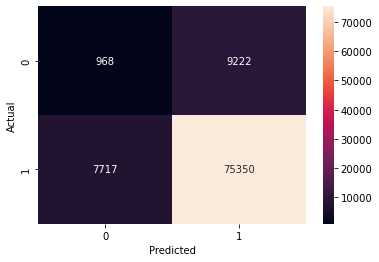

In [86]:
sn.heatmap(crosstab,annot=True,fmt='d')

# Hybrid Model Random Forest Classifier+Gradient Boost Classifier

In [87]:
rf = RandomForestClassifier()
rf.fit(input_train, load_data_targets_train)

RandomForestClassifier()

In [88]:
rf_predictions_train = rf.predict_proba(input_train)

In [89]:
rf_predictions_train

array([[0.02, 0.98],
       [0.11, 0.89],
       [0.  , 1.  ],
       ...,
       [0.02, 0.98],
       [0.04, 0.96],
       [0.04, 0.96]])

In [90]:
new_x_train = np.concatenate((input_train, rf_predictions_train), axis=1)

In [91]:
gb = GradientBoostingClassifier()
gb.fit(new_x_train, load_data_targets_train)

GradientBoostingClassifier()

In [92]:
rf_predictions_test = rf.predict_proba(input_test)
new_x_test = np.concatenate((input_test, rf_predictions_test), axis=1)
hybrid_predictions = gb.predict(new_x_test)

In [93]:
rf_predictions_test=rf_predictions_test[: ][:,1]

In [94]:
rf_predictions_test_df=pd.DataFrame(rf_predictions_test)

In [95]:
rf_predictions_test_df

,0
0,0.98
1,0.89
2,1.00
3,0.32
4,0.29
...,...
373023,0.98
373024,0.96
373025,0.98
373026,0.96


In [96]:
loan_data_targets_test_temp=load_data_targets_test

In [97]:
loan_data_targets_test_temp.reset_index(drop=True,inplace=True)

In [98]:
df_actual_predicted_probs=pd.concat([loan_data_targets_test_temp,pd.DataFrame(rf_predictions_test)],axis=1)

In [99]:
df_actual_predicted_probs.columns=['load_data_target_test','predicted']

In [100]:
df_actual_predicted_probs.index=load_data_inputs_test.index

In [101]:
df_actual_predicted_probs.head()

,load_data_target_test,predicted
427211,1,0.98
206088,1,0.89
136020,1,1.00
412305,1,0.32
36159,1,0.29


In [102]:
df_actual_predicted_probs.shape

(373028, 2)

In [103]:
tr=0.8
df_actual_predicted_probs['predicted']=np.where(df_actual_predicted_probs['predicted']>tr,1,0)

In [104]:
crosstab = pd.crosstab(df_actual_predicted_probs['load_data_target_test'],df_actual_predicted_probs['predicted'],rownames=['Actual'],colnames=['Predicted'])

In [105]:
true_positive = crosstab[1][1]

In [106]:
true_negative = crosstab[0][0]

In [107]:
false_positive = crosstab[0][1]

In [108]:
false_negative = crosstab[1][0]

In [109]:
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

In [110]:
print('Accuracy of hybrid model: '+str(round(accuracy*100,3))+'%')

Accuracy of hybrid model: 80.323%


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

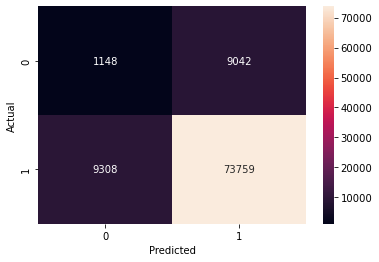

In [111]:
sn.heatmap(crosstab,annot=True,fmt='d')